In [1]:
%matplotlib inline
%config Completer.use_jedi = False

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
train_data = pd.read_excel("../../data/unzipped/Train.xlsx", skiprows=range(1,2), index_col=0)

In [7]:
train_data.head()

,"Диффузный индекс цен на выпускаемую продукцию, ожидаемые изменения","Диффузный индекс цен на покупаемую продукцию, ожидаемые изменения","Диффузный индекс заработной платы, ожидаемые изменения","Диффузный индекс занятости, ожидаемые изменения","Диффузный индекс выпуска, ожидаемые изменения","Диффузный индекс закупок оборудования, ожидаемые изменения","Диффузный индекс финансового состояния, ожидаемые изменения","Диффузный индекс портфеля заказов, ожидаемые изменения","Диффузный индекс задолженности банкам, ожидаемые изменения","Производство скота и птицы, тыс.тонн",...,"Среднемесячная пенсия, руб.",Реальная пенсия,MIACR,"Ставка по краткосрочным кредитам, население","Ставка по долгосрочным кредитам, население","Ставка по краткосрочным кредитам, фирмы","Ставка по долгосрочным кредитам, фирмы","Краткосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Долгосрочные кредиты и прочие средства нефинансовым организациям, млрд.руб","Цена Urals, долл/бар"
2003m01,74,93,61,40,44,28,47,44,22,6.269096,...,7.288791,0.000000,6.331,21.5,18.9,14.5,17.3,6.993658,6.290272,3.383413
2003m02,78,95,66,37,49,30,53,56,18,6.320768,...,7.313953,0.008960,2.514,22.2,17.8,14.1,19.6,7.019476,6.298398,3.420624
2003m03,84,98,72,45,56,29,51,61,25,6.361302,...,7.314153,-0.001091,2.625,18.3,19.9,13.3,16.4,7.031299,6.325613,3.363693
2003m04,83,95,70,40,66,38,59,69,23,6.269096,...,7.382809,0.057178,1.888,20.0,21.3,13.4,14.9,7.048821,6.343001,3.130242
2003m05,79,94,76,43,66,33,63,68,23,6.177944,...,7.382809,0.049146,1.308,23.1,21.5,12.5,15.0,7.076400,6.371099,3.210488


In [10]:
train_data.values[:, 0]

array([74., 78., 84., 83., 79., 75., 74., 76., 74., 71., 77., 72., 80.,
       81., 85., 76., 73., 79., 74., 74., 69., 74., 73., 73., 79., 85.,
       81., 76., 73., 70., 67., 67., 69., 74., 70., 68., 77., 82., 79.,
       77., 69., 69., 67., 73., 73., 79., 74., 74., 80., 84., 85., 82.,
       73., 73., 75., 72., 78., 75., 79., 77., 82., 85., 89., 81., 81.,
       77., 74., 75., 74., 75., 72., 69., 67., 57., 57., 61., 58., 55.,
       53., 52., 53., 58., 55., 58., 64., 69., 67., 76., 64., 67., 65.,
       68., 66., 67., 66., 62., 75., 80., 84., 81., 71., 70., 67., 69.,
       71., 68., 67., 61., 67., 67., 74., 68., 63., 61., 64., 67., 66.,
       66., 63., 69., 70., 73., 75., 63., 68., 60., 57., 65., 64., 56.,
       55., 58., 64., 67., 69., 63., 58., 63., 63., 58., 63., 67., 63.,
       66., 81., 78., 85., 81., 74., 66., 60., 53., 60., 57., 65., 64.])

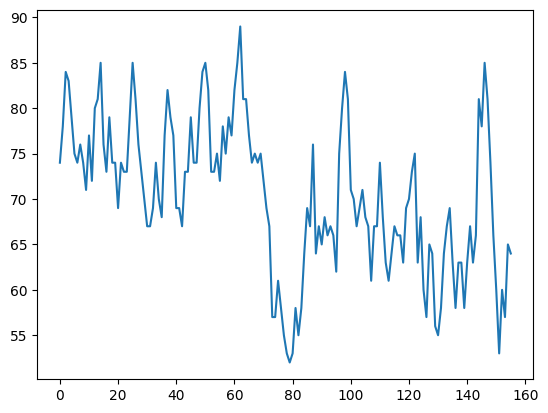

In [11]:
plt.plot(train_data.values[:, 0])

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [125]:
X = train_data.values[:, 0]

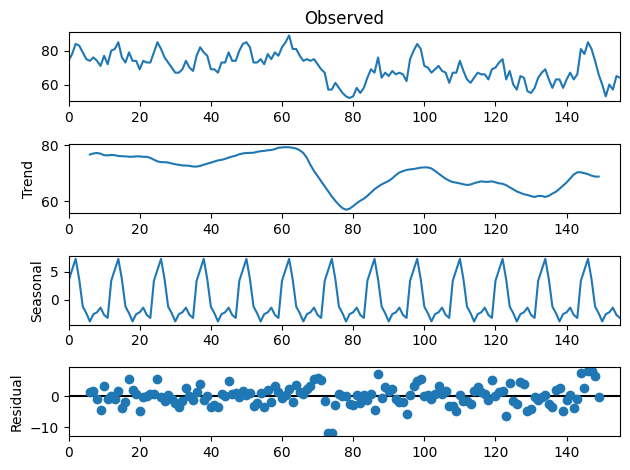

In [126]:
decompose_result = seasonal_decompose(X, model="additive", period=12)

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

In [128]:
from sklearn.linear_model import LinearRegression

In [156]:
wo_seasons = X - seasonal
ids = np.arange(len(X)).reshape(-1,1)
trend_model = LinearRegression().fit(ids, wo_seasons)

In [158]:
trend_model.coef_, trend_model.intercept_

(array([-0.08832008]), 77.12044706775)

In [159]:
diff = wo_seasons - trend_model.predict(ids)

In [160]:
diff_norm = (diff - np.mean(diff)) / np.std(diff)

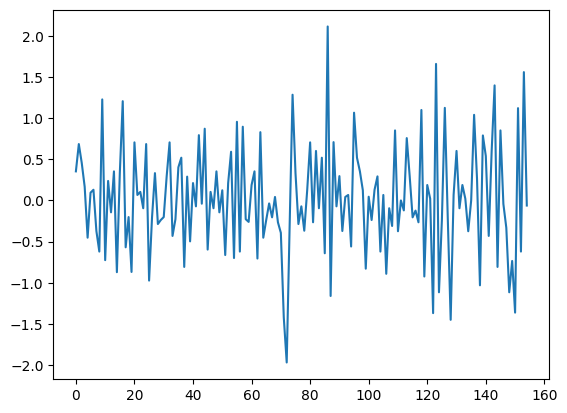

In [166]:
plt.plot(np.diff(diff_norm))

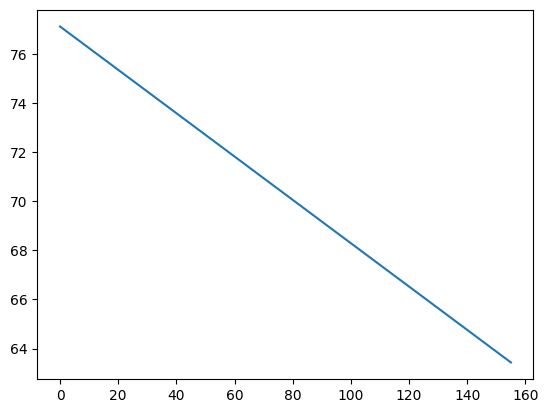

In [162]:
plt.plot(trend_model.predict(ids))

In [163]:
from statsmodels.tsa.stattools import adfuller

In [322]:
result = adfuller(diff_norm)

In [323]:
result

(-3.369446287684339,
 0.012045602952674067,
 1,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 274.0212710268156)

In [1770]:
window = 12 * 3

In [1771]:
def remove_nan_prefix(X):
    last_nan = np.max(list(np.where(np.isnan(X))[0]) + [-1])
    X = X[last_nan + 1:]
    return X

In [1772]:
class Normalizer:
    def transform(self, X):
        X = remove_nan_prefix(X)
        r = seasonal_decompose(X, model="additive", period=12)
        trend = X - r.seasonal
        
#         ids = np.arange(len(trend)).reshape(-1, 1)
#         trend_model = LinearRegression().fit(ids, trend)
#         linear_trend = trend_model.predict(ids)
#         trend -= linear_trend
        
        mean = np.mean(trend)
        std = np.std(trend)
        trend_norm = (trend - mean) / std
        
        self.seasonal = r.seasonal
        self.mean = mean
        self.std = std
        self.trend_model = trend_model
        return trend_norm
    def inverse(self, X):
        X *= self.std
        X += self.mean
#         ids = np.arange(len(X)).reshape(-1, 1)
#         X += self.trend_model.predict(ids)
        seasons = np.tile(self.seasonal, len(X) // len(self.seasonal) + 1)[:len(X)]
        X += seasons
        return X

In [1773]:
import tqdm

X_normed = []

offset = 15
train_gap = offset + 12 + window

for i in tqdm.tqdm(np.arange(train_data.shape[1]), position=0):
    X = train_data.values[:, i][:-train_gap]
    X = Normalizer().transform(X)
    for j in range(len(X) - window - 1):
        sample = X[j:j+ window+1]
        X_normed.append(sample)

100%|█████████████████████████████████████████| 69/69 [00:00<00:00, 1226.27it/s]


In [1774]:
from sklearn.neighbors import KNeighborsRegressor

In [1775]:
knn_model = KNeighborsRegressor(n_neighbors=5)
linear_model = LinearRegression()

In [1776]:
knn_weights = np.arange(window).reshape(1, -1) + 1

In [1777]:
X_normed = np.array(X_normed)
X_train = np.array([x[:-1] for x in X_normed])
y_train = np.array([x[-1] - x[-2] for x in X_normed])

In [1779]:
# knn_model.fit(X_train * knn_weights, y_train)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [1780]:
X_train.shape, knn_weights.shape, (X_train * knn_weights).shape

((3768, 36), (1, 36), (3768, 36))

In [1781]:
v = X_train[0].reshape(1,-1) * knn_weights
v.shape

(1, 36)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  This is separate from the ipykernel package so we can avoid doing imports until


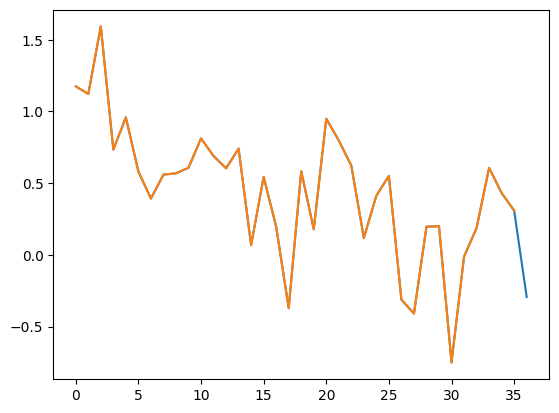

In [1782]:
t = X_train[60]
p = knn_model.predict(t.reshape(1,-1))# * knn_weights)
plt.plot(np.array(list(t.reshape(-1)) + [p.reshape(-1)]))
plt.plot(t)

In [1783]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [1784]:
# from sklearn.manifold import TSNE
# tsne = TSNE(verbose=1)
# res = tsne.fit_transform(X_train)

In [1785]:
# plt.plot(res[:, 0], res[:,1], '*')

In [1786]:
class ZeroModel:
    def predict(self,_):
        return [0]

class LastConstModel:
    def predict(self, X):
        return [X[0][-1]]
    
class FirstConstModel:
    def __init__(self):
        self.const = None

    def predict(self, X):
        if self.const is None:
            self.const = X[0][-1]
        return [self.const]
    
class Weighted:
    def __init__(self, weights, base_model):
        self.weights = weights
        self.base_model = base_model
    def predict(self, X):
        return self.base_model.predict(X * self.weights)
    
class PredictWithDelta:
    def __init__(self, base_model):
        self.base_model = base_model
    def predict(self, X):
        y = self.base_model.predict(X)
        return X[:, -1] + y

In [1787]:
def predict_for_seq(seq, steps, model):
    assert len(seq.shape) == 1, seq.shape[0] >= window + 1
    normalizer = Normalizer()
    seq = normalizer.transform(seq)
    for i in np.arange(steps):
        subSeq = seq[-window:]
        origSubSeq = subSeq
        x = subSeq.reshape(1,-1)
        y = model.predict(x)[0]
        subSeq = list(subSeq) + [y]
        assert np.mean((subSeq[:-1] - origSubSeq) ** 2) < 1e-6, (subSeq, origSubSeq)
        seq = np.append(seq, subSeq[-1])
    seq = normalizer.inverse(seq)
    return seq

In [1788]:
from sklearn.metrics import r2_score, mean_squared_error

In [1789]:
def total(wmsfes):
    score = 0
    alpha = 12
    for m in wmsfes:
        score += (1.8 - 1.6 / (1 + np.exp(-alpha * m)))
    return score / len(wmsfes)


class Task:
    def __init__(self, history, orig, pred, period=12):
        assert period in [4,12]
        self.history = history
        self.orig = orig
        self.pred = pred
        self.period = period


def wmsfe(tasks):
    hm = np.array([len(t.orig) for t in tasks])
    km = np.sum(hm)
    scores = []
    for t in tasks:
        assert t.orig.shape == t.pred.shape
        disp = np.var(t.history[t.period:] - t.history[:-t.period])
        score = np.sum((t.orig - t.pred) ** 2 / (np.arange(len(t.pred)) + 1)) / disp
        scores.append(score)
    return np.sum(scores) / km, scores / hm


class TaskSet:
    def __init__(self):
        self.groups = []
        
    def addFormatedTasks(self, tasks2d):
        for g in tasks2d:
            self.addGroup()
            for t in g:
                self.addTask(t)

    def addTask(self, task):
        self.groups[-1].append(task)

    def addGroup(self):
        self.groups.append([])

    def calcScore(self):
        losses = []
        for g in self.groups:
            loss, _ = wmsfe(g)
            losses.append(loss)
        return total(losses)

In [1790]:
from scipy.stats import norm

def p_val(x):
    return 2 * min(norm.cdf(-x), norm.cdf(x))

def log_z_test(res1, res2):
    res2 = np.log(res2)
    res1 = np.log(res1)
    delta = res2 - res1
    mu_z = np.mean(delta)
    sigma = np.std(delta)
    z = mu_z / sigma * T ** 0.5
    p = p_val(z)
    win_rate = np.mean(res1 <= res2) 
    return {"p_value":p, "mu": mu_z, "sigma": sigma, "win_rate": win_rate}

In [1791]:
def measure_on_all_train_data(model, offset=15):
    mse = 0
    N = train_data.shape[1]
    tasks = []
    for t in np.arange(N):
        history = remove_nan_prefix(train_data.values[:, t])
        window_data = history[:-offset]
        r = predict_for_seq(window_data, offset, model)
        task = Task(window_data, history[-offset:], r[-offset:])
        tasks.append(task)
    return tasks

In [1792]:
first_const_model_res = measure_on_all_train_data(FirstConstModel())
last_const_model_res = measure_on_all_train_data(LastConstModel())
# knn_model_res = measure_on_all_train_data(PredictWithDelta(Weighted(knn_weights, knn_model)))
knn_model_res = measure_on_all_train_data(PredictWithDelta(knn_model))
linear_model_res = measure_on_all_train_data(PredictWithDelta(linear_model))
# knn_norm_model_res = measure_on_all_train_data(PredictWithInputNormalization(base_model))

In [1793]:
fc, first_const_model_scores = wmsfe(first_const_model_res)
lc, last_const_model_scores = wmsfe(last_const_model_res)
k, knn_model_scores = wmsfe(knn_model_res)
l, linear_model_scores = wmsfe(linear_model_res)
print(fc, lc, k, l)

26.561593424031393 1.6253899642373788 1.5238696422911238 2.9980927669137207


In [1794]:
taskSet = TaskSet()
taskSet.addFormatedTasks([[x] for x in last_const_model_res])
taskSet.calcScore()

0.3328912426003572

In [1795]:
taskSet = TaskSet()
taskSet.addFormatedTasks([[x] for x in knn_model_res])
taskSet.calcScore()

0.3526681447366983

In [1796]:
log_z_test(knn_model_scores, last_const_model_scores)

{'p_value': 0.0888121464382206,
 'mu': 0.15954426198448432,
 'sigma': 0.5929647846114491,
 'win_rate': 0.5362318840579711}

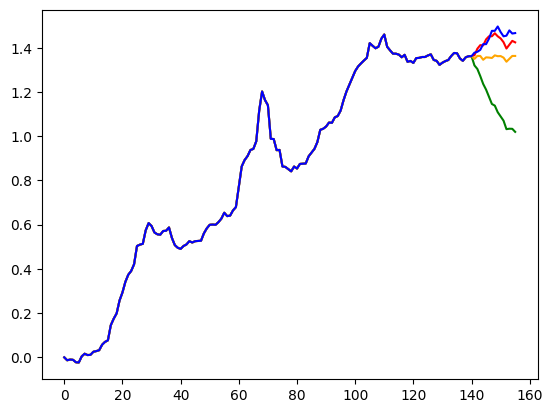

In [1799]:
T = 41
orig = train_data.values[:, T]
window_data = orig[:-offset]
r1 = predict_for_seq(window_data, offset, PredictWithDelta(knn_model))
r2 = predict_for_seq(window_data, offset, PredictWithDelta(linear_model))
r3 = predict_for_seq(window_data, offset, PredictWithDelta(ZeroModel()))
plt.plot(r1, 'red')
plt.plot(r2, 'green')
plt.plot(r3, 'orange')
plt.plot(train_data.values[:, T], 'blue')
plt.show()